# Raziskovalna analiza podatkov
## HiggsML Challenge
Klemen Kenda, april 2016

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing data

In [2]:
dirName = '../../data/'
fileName = dirName + 'training.csv'
data = pd.read_csv(fileName)

# replace missing values with NaN
data = data.replace(-999.0, np.nan)

#### Initial data analysis

In [3]:
# number of rows
rows = data.shape[0]

# make separate variables for signal and background
signal = data.query('Label == "s"')
background = data.query('Label == "b"')

# number of signal rows
signalRows = signal.shape[0]
# number of background rows
backgroundRows = background.shape[0]

In [4]:
{rows, signalRows, backgroundRows}

{85667, 164333, 250000}

In [14]:
# by label
byLabel = data.groupby('Label')

# write to file
# TODO 
#   - smaller fonts
#   - different arrangement
fo = open("byLabelDescriptionStats.tex", "w")
fo.write(byLabel.describe().transpose().to_latex())
fo.close()

fo = open("dataDescriptionStats.html", "w")
fo.write(byLabel.describe().transpose().to_html())
fo.close()

## Histograms

In [6]:
def DoubleHist(var, rMin, rMax):
    plt.figure(var);
    num_bins = 30;
    x = background[var]
    y = signal[var]
    common_params = dict(bins = 50, range=(rMin, rMax), normed=1)
    n, bins, patches = plt.hist(x, facecolor='green', alpha=0.5, **common_params)
    n, bins, patches = plt.hist(y, facecolor='orange', alpha=0.5, **common_params)
    plt.title(var)
    plt.savefig('ea_hist_' + var.lower() + '.pdf')

In [ ]:
# histograms
DoubleHist('Weight', 0, 8)
DoubleHist('DER_mass_MMC', 0, 400)
DoubleHist('DER_mass_transverse_met_lep', 0, 200)
DoubleHist('DER_mass_vis', 0, 300)
DoubleHist('DER_pt_h', 0, 400)
DoubleHist('DER_deltaeta_jet_jet', 0, 9)
DoubleHist('DER_mass_jet_jet', 0, 2500)
DoubleHist('DER_prodeta_jet_jet', -20, 15)
DoubleHist('DER_deltar_tau_lep', 0, 6)
DoubleHist('DER_pt_tot', 0, 100)
DoubleHist('DER_sum_pt', 0, 1000)
DoubleHist('DER_pt_ratio_lep_tau', 0, 7)
DoubleHist('DER_met_phi_centrality', -1.5, 1.5)
DoubleHist('DER_lep_eta_centrality', 0, 1)

DoubleHist('PRI_tau_pt', 0, 180)
DoubleHist('PRI_tau_eta', -2.5, 2.5)
DoubleHist('PRI_tau_phi', -3.2, 3.2)

DoubleHist('PRI_lep_pt', 0, 200)
DoubleHist('PRI_lep_eta', -2.5, 2.5)
DoubleHist('PRI_lep_phi', -3.2, 3.2)

DoubleHist('PRI_met', 0, 300)
DoubleHist('PRI_met_phi', -3.2, 3.2)
DoubleHist('PRI_met_sumet', 0, 1000)

DoubleHist('PRI_jet_num', 0, 3)

DoubleHist('PRI_jet_leading_pt', 0, 500)
DoubleHist('PRI_jet_leading_eta', -4.5, 4.5)
DoubleHist('PRI_jet_leading_phi', -3.2, 3.2)

DoubleHist('PRI_jet_subleading_pt', 0, 300)
DoubleHist('PRI_jet_subleading_eta', -4.5, 4.5)
DoubleHist('PRI_jet_subleading_phi', -3.2, 3.2)

DoubleHist('PRI_jet_all_pt', 0, 400)

## Correlation Matrix

In [7]:
import seaborn as sns
from sklearn.cluster import KMeans

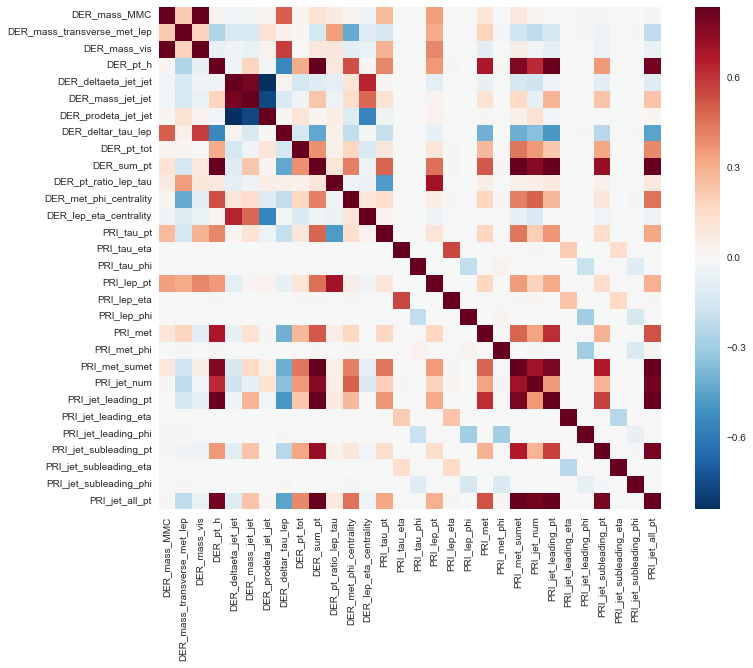

In [8]:
corrData = data.copy()
del corrData['EventId']
del corrData['Weight']
cm = corrData.corr()
f, ax =  plt.subplots(figsize=(12, 9))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)
plt.setp(ax.yaxis.get_majorticklabels(), rotation=90)
sns.heatmap(cm, vmax=.8,square=1)
f.savefig('ea_corr_data.pdf')

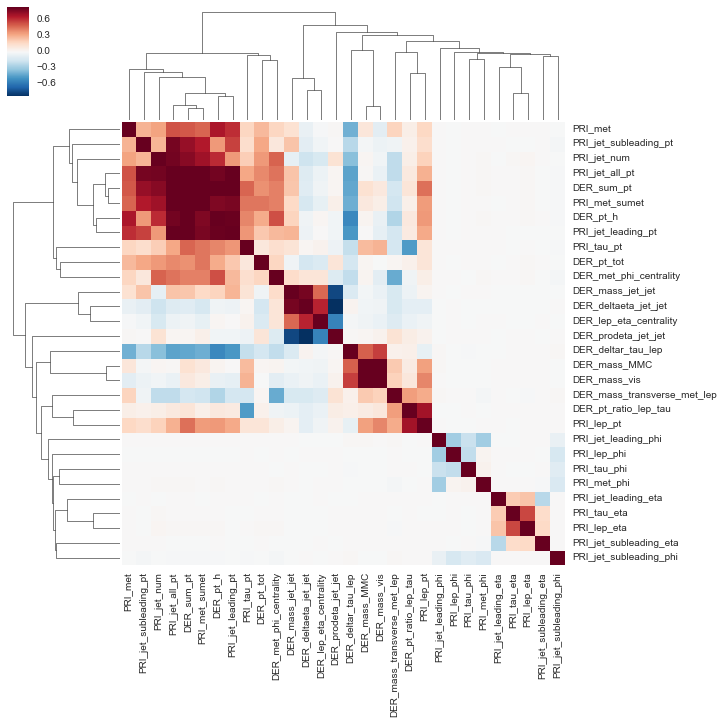

In [9]:
cg = sns.clustermap(cm, vmax = .8, square=1)
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.setp(cg.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
cg.savefig('ea_corr_clustermap.pdf')

## Scatter Plots

In [10]:
# for correlated
df = data[['DER_mass_jet_jet', 'DER_lep_eta_centrality', 'DER_deltaeta_jet_jet', 'DER_prodeta_jet_jet', 'Label']].sample(n = 2000)

In [11]:
color_wheel = {"s": "#ff0000", "b": "#99ff99"}
colors = df["Label"].map(lambda x: color_wheel.get(x))
ax = scatter_matrix(df, color=colors, alpha=0.5, figsize=(15, 15), diagonal='kde')

NameError: name 'scatter_matrix' is not defined

In [85]:
plt.show()

In [12]:
# for correlated - top
df = data[['DER_sum_pt', 'PRI_jet_all_pt', 'PRI_met_sumet', 'DER_pt_h', 'Label']].sample(n = 2000)

In [13]:
color_wheel = {"s": "#ff0000", "b": "#99ff99"}
colors = df["Label"].map(lambda x: color_wheel.get(x))
ax = scatter_matrix(df, color=colors, alpha=0.5, figsize=(15, 15), diagonal='kde')

NameError: name 'scatter_matrix' is not defined

In [90]:
plt.show()

In [91]:
# for non correlated
df = data[['DER_sum_pt', 'DER_lep_eta_centrality', 'DER_pt_ratio_lep_tau', 'PRI_lep_eta', 'Label']].sample(n = 2000)

In [92]:
color_wheel = {"s": "#ff0000", "b": "#99ff99"}
colors = df["Label"].map(lambda x: color_wheel.get(x))
ax = scatter_matrix(df, color=colors, alpha=0.5, figsize=(15, 15), diagonal='kde')

In [93]:
plt.show()

## No Value

In [126]:
# generate table with missing value data
numS = signal.shape[0]
signalC = signal.isnull().sum()/numS
numB = background.shape[0]
backgroundC = background.isnull().sum()/numB
result = pd.concat([signalC, backgroundC], axis=1)
resultF = result[(result[1] != 0)]
fo = open('exploratoryNaNValues.tex', 'w')
fo.write(resultF.to_latex())
fo.close()

In [127]:
# mean for missing values per type
resultF.mean()

0    0.479367
1    0.624191
dtype: float64

## PCA

In [7]:
from sklearn.decomposition import PCA

In [8]:
# prepare the np.array
pcaData = data.copy()
del pcaData['EventId']
del pcaData['Weight']
del pcaData['Label']
pcaNpData = pcaData.as_matrix()

In [9]:
# preprocesing 
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(pcaNpData)
pcaNpDataClean = imp.transform(pcaNpData)

In [10]:
# run PCA
pca = PCA()
pca.fit(pcaNpDataClean)

PCA(copy=True, n_components=None, whiten=False)

In [11]:
pca.explained_variance_ratio_

array([  5.00850597e-01,   3.76427346e-01,   4.35767131e-02,
         2.04534664e-02,   1.45040641e-02,   1.35373240e-02,
         9.09300842e-03,   7.42198063e-03,   4.09930585e-03,
         3.68345958e-03,   2.82605268e-03,   1.81688038e-03,
         1.49152542e-03,   4.00773332e-05,   3.65686336e-05,
         2.77548345e-05,   2.63923830e-05,   1.81175521e-05,
         1.50099603e-05,   1.47563870e-05,   1.06636495e-05,
         9.07923781e-06,   7.44888037e-06,   6.80656969e-06,
         2.04017129e-06,   1.71112343e-06,   1.21687453e-06,
         3.78135310e-07,   2.54626624e-07,   7.50618922e-13])

In [12]:
pca.n_components_

30

In [13]:
pca.transform(pcaNpDataClean).shape

(250000, 30)

In [14]:
pcaNpDataClean.shape

(250000, 30)

In [15]:
sum(pca.explained_variance_ratio_)

0.99999999999999967

### PCA vizualizacija v 2D

In [83]:
# sampling
pca2DData = data.copy().sample(10000);
pca2DLabels = pca2DData['Label']

del pca2DData['EventId']
del pca2DData['Weight']
del pca2DData['Label']
pca2DNpData = pca2DData.as_matrix()
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(pcaNpData)
pca2DNpDataClean = imp.transform(pca2DNpData)

pca2D = PCA(n_components=3)
pca2D.fit(pca2DNpDataClean)
pcaData = pca2D.transform(pca2DNpDataClean)

In [84]:
def colorMap(x):
    if x == "s": 
        rVal = "red"
    else:
        rVal = "green"
    return rVal
colors = [colorMap(x) for x in pca2DLabels]

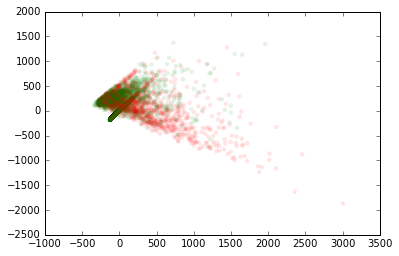

In [88]:
colors = [colorMap(x) for x in pca2DLabels]
plt.figure()
plt.scatter(pcaData[:,0], pcaData[:,1],c=colors, alpha=0.1, lw=0)
plt.savefig('ea_pca_2d.pdf')

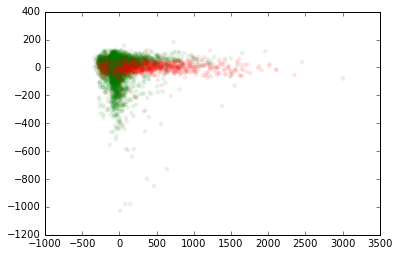

In [89]:
plt.figure()
plt.scatter(pcaData[:,0], pcaData[:,2],c=colors, alpha=0.1, lw=0)
plt.savefig('ea_pca_2d_1_3.pdf')

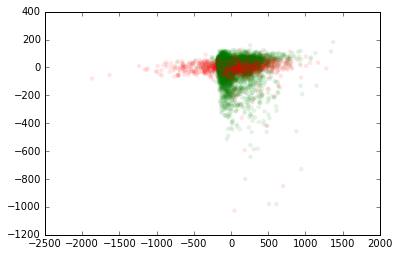

In [90]:
plt.figure()
plt.scatter(pcaData[:,1], pcaData[:,2],c=colors, alpha=0.1, lw=0)
plt.savefig('ea_pca_2d_2_3.pdf')

## LDA

In [21]:
# import
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [53]:
lda = LinearDiscriminantAnalysis(n_components=3)
lda2D = lda.fit(pca2DNpDataClean, pca2DLabels)
ldaData = lda2D.transform(pca2DNpDataClean)

C:\Users\kkenda\Programs\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [54]:
plt.figure()
plt.scatter(ldaData[:,0], ldaData[:,1],c=colors, alpha=0.05, lw=0)

IndexError: index 1 is out of bounds for axis 1 with size 1

In [55]:
ldaData

array([[ 0.59136819],
       [-0.17102475],
       [ 0.40758914],
       ..., 
       [-0.76574313],
       [-0.06113317],
       [ 0.19016629]])

In [62]:
pca2DLabels[30051 ]

's'

In [69]:
pca2DNpDataClean

array([[  1.33691000e+02,   2.28640000e+01,   1.01260000e+02, ...,
         -1.18452642e-02,  -1.58228913e-03,   0.00000000e+00],
       [  8.96230000e+01,   5.55160000e+01,   6.96320000e+01, ...,
         -1.18452642e-02,  -1.58228913e-03,  -0.00000000e+00],
       [  8.56210000e+01,   1.51380000e+01,   5.77920000e+01, ...,
         -1.18452642e-02,  -1.58228913e-03,   4.50380000e+01],
       ..., 
       [  1.47711000e+02,   6.82870000e+01,   1.24535000e+02, ...,
         -1.18452642e-02,  -1.58228913e-03,   3.78970000e+01],
       [  1.13931000e+02,   4.87720000e+01,   9.61490000e+01, ...,
         -1.18452642e-02,  -1.58228913e-03,   0.00000000e+00],
       [  1.67793000e+02,   7.60750000e+01,   1.26351000e+02, ...,
         -1.18452642e-02,  -1.58228913e-03,   0.00000000e+00]])

## Vizualizacija zaporedij

### Oznaka / labela

In [243]:
def valueMap(x):
    if x == "s": 
        rVal = 1
    else:
        rVal = 0
    return rVal
labelValue = [valueMap(x) for x in data['Label']]

In [247]:
ts = pd.Series(labelValue)

In [266]:
ts.ewm(span=10000).mean().plot()

In [267]:
plt.show()


### Poljuben feature

In [5]:
def visualizeFeature(name):
    series = data[name]
    ts = pd.Series(series)
    ts.ewm(span=10000).mean().plot()
    plt.show()

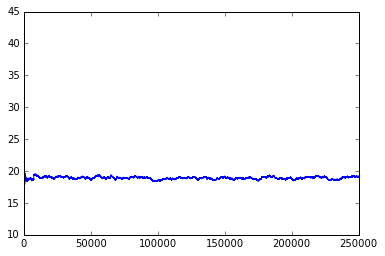

In [6]:
visualizeFeature('DER_pt_tot')